In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
# On importe le csv application_data
# On indique vouloir garder toutes les colonnes
application = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_Originaux/application_data.csv')
pd.set_option('display.max_columns',None)
application.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Dimmension en taille
print("Database dimension - application:",application.shape)
print("Database size - application:",application.size)


Database dimension - application: (307511, 122)
Database size - application: 37516342


# Verification: Les colonnes retirées ne portent pas d'informations importantes (influence sur la target)

In [5]:
# Je vais tenter d'expliquer la fonction ligne par ligne : 

# nb_lignes=df.shape[0]        -> le shape[0] représente toutes les lignes du dataframe
# i=0                          -> si on part de 1 décalage dans les colonnes : on balaye toutes les colonnes du df
# for elem in df.isna().sum(): -> boucle qui permet de compter le total de valeurs nulles colonne par colonne
# if 100*elem/nb_lignes > 40%:  -> si le pourcentage de NAN est supérieur 40 % on affiche
# col=list(df.columns)[i]      -> on extrait le nom de la colonne associé à l'indexe i
# print("Nan sur ",col,round(100*elem/nb_li),"%")                  
# -> On indique la colonne et le pourcentage de Nan de la colonne associée 
# print(df[df[col].isna()]['TARGET'].value_counts(normalize=True)) 
# -> sur la colonne target pourcentage de NAN quand TARGET = 0 et 1 fréquence relative des valeurs uniques
                                                                       
# print('#################################')                        -> On marque l'itération
# i=i+1                                                             -> Itération sur la TARGET

nb_li=307511 # ou nb_li = df.shape[0]
i=0

for elem in application.isna().sum():
    if 100*elem/nb_li > 40:
        col=list(application.columns)[i]
        print("Nan sur",col,round(100*elem/nb_li),"%")
        print(application[application[col].isna()]['TARGET'].value_counts(normalize=True))
        print('#################################')
        
    i=i+1
        

Nan sur OWN_CAR_AGE 66 %
0    0.915
1    0.085
Name: TARGET, dtype: float64
#################################
Nan sur EXT_SOURCE_1 56 %
0    0.914805
1    0.085195
Name: TARGET, dtype: float64
#################################
Nan sur APARTMENTS_AVG 51 %
0    0.908465
1    0.091535
Name: TARGET, dtype: float64
#################################
Nan sur BASEMENTAREA_AVG 59 %
0    0.910872
1    0.089128
Name: TARGET, dtype: float64
#################################
Nan sur YEARS_BEGINEXPLUATATION_AVG 49 %
0    0.907951
1    0.092049
Name: TARGET, dtype: float64
#################################
Nan sur YEARS_BUILD_AVG 66 %
0    0.913193
1    0.086807
Name: TARGET, dtype: float64
#################################
Nan sur COMMONAREA_AVG 70 %
0    0.914258
1    0.085742
Name: TARGET, dtype: float64
#################################
Nan sur ELEVATORS_AVG 53 %
0    0.908994
1    0.091006
Name: TARGET, dtype: float64
#################################
Nan sur ENTRANCES_AVG 50 %
0    0.908214
1  

In [6]:
 # Mauvaise stratégie : 
 #   1 - nous avons que des variables numériques
 #   2 - on va d'abord rechercher les variables les plus corrélées à TARGET

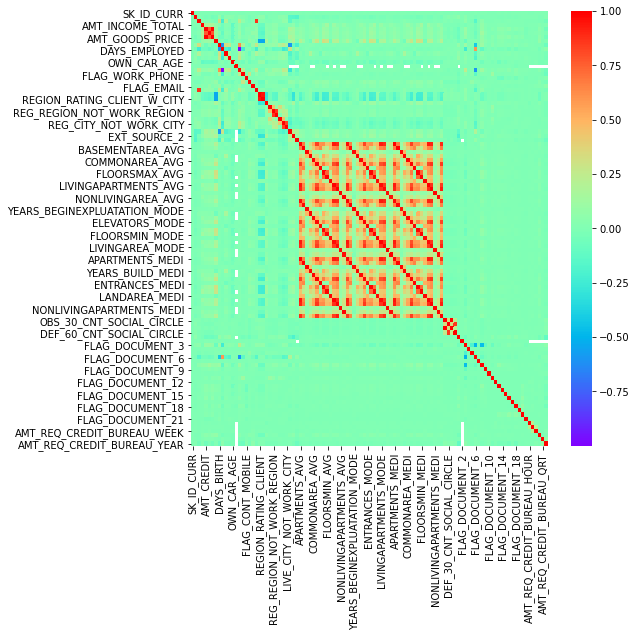

In [7]:
# Corrélation entre les variables 

corrmat = application.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [8]:
# On trouve 122 colonnes 
application.shape

(307511, 122)

In [9]:
# On observe la distribution des valeurs de la colonne TARGET : grande majorité de clients qui ont eu des retards de remboursement. 

In [10]:
# On à un problème on passe de 122 colonnes à 106 ..
# On calcule la corrélation par paire des colonnes, à l'exclusion des valeurs NA/null.
corrMatrix = application.corr(method='pearson')
corrMatrix.shape

(106, 106)

In [11]:
# On vérifie toutes les données uniques dans la colonne GENDER
print(application['CODE_GENDER'].unique())

['M' 'F' 'XNA']


In [12]:
# On cherche a remplacer les variables où il y a des variables discètes par des variables numériques (continues)
# Lorsqu'on fera de la visualisation, on fera un mapping inverse

application.NAME_CONTRACT_TYPE=application.NAME_CONTRACT_TYPE.replace(["Cash loans","Revolving loans"],[1,2])
application.CODE_GENDER=application.CODE_GENDER.replace(["M","F","XNA"],[1,2,3])
application.FLAG_OWN_CAR=application.FLAG_OWN_CAR.replace(["Y","N"],[1,2])
application.FLAG_OWN_REALTY=application.FLAG_OWN_REALTY.replace(["Y","N"],[1,2])
application.NAME_TYPE_SUITE=application.NAME_TYPE_SUITE.replace(['Unaccompanied','Family','Spouse, partner','Children','Other_A','Other_B','Group of people'],[1,2,3,4,5,6,7])
application.NAME_INCOME_TYPE=application.NAME_INCOME_TYPE.replace(['Working','State servant','Commercial associate','Pensioner','Unemployed','Student','Businessman','Maternity leave'],[1,2,3,4,5,6,7,8])
application.NAME_EDUCATION_TYPE=application.NAME_EDUCATION_TYPE.replace(['Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree'],[1,2,3,4,5])
application.NAME_FAMILY_STATUS=application.NAME_FAMILY_STATUS.replace(['Single / not married','Married','Civil marriage','Widow','Separated','Unknown'],[1,2,3,4,5,6])
application.NAME_HOUSING_TYPE=application.NAME_HOUSING_TYPE.replace(['House / apartment','Rented apartment','With parents','Municipal apartment','Office apartment','Co-op apartment'],[1,2,3,4,5,6])
application.OCCUPATION_TYPE=application.OCCUPATION_TYPE.replace(['Laborers','Core staff','Accountants','Managers','Drivers','Sales staff','Cleaning staff','Cooking staff','Private service staff','Medicine staff','Security staff','High skill tech staff','Waiters/barmen staff','Low-skill Laborers','Realty agents','Secretaries','IT staff','HR staff'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
application.WEEKDAY_APPR_PROCESS_START=application.WEEKDAY_APPR_PROCESS_START.replace(['WEDNESDAY','MONDAY','THURSDAY','SUNDAY','SATURDAY','FRIDAY','TUESDAY'],[3,4,1,7,6,5,2])
application.ORGANIZATION_TYPE=application.ORGANIZATION_TYPE.replace(['Business Entity Type 3','School','Government','Religion','Other','XNA','Electricity','Medicine','Business Entity Type 2','Self-employed','Transport: type 2','Construction','Housing','Kindergarten','Trade: type 7','Industry: type 11','Military','Services','Security Ministries','Transport: type 4','Industry: type 1','Emergency','Security','Trade: type 2','University','Transport: type 3','Police','Business Entity Type 1','Postal','Industry: type 4','Agriculture','Restaurant','Culture','Hotel','Industry: type 7','Trade: type 3','Industry: type 3','Bank','Industry: type 9','Insurance','Trade: type 6','Industry: type 2','Transport: type 1','Industry: type 12','Mobile','Trade: type 1','Industry: type 5','Industry: type 10','Legal Services','Advertising','Trade: type 5','Cleaning','Industry: type 13','Trade: type 4','Telecom','Industry: type 8','Realtor','Industry: type 6'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58])
application.FONDKAPREMONT_MODE=application.FONDKAPREMONT_MODE.replace(['reg oper account','org spec account','reg oper spec account','not specified'],[1,2,3,4])
application.HOUSETYPE_MODE=application.HOUSETYPE_MODE.replace(['block of flats','terraced house','specific housing'],[1,2,3])
application.WALLSMATERIAL_MODE=application.WALLSMATERIAL_MODE.replace(['Stone, brick','Block','Panel','Mixed','Wooden','Others','Monolithic'],[1,2,3,4,5,6,7])
application.EMERGENCYSTATE_MODE=application.EMERGENCYSTATE_MODE.replace(['Yes','No'],[1,2])


application.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,2,1,0,202500.0,406597.5,24700.5,351000.0,1.0,1,1,1,1,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,1.0,2,2,3,10,0,0,0,0,0,0,1,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,1.0,1.0,0.0149,1.0,2.0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,2,2,2,0,270000.0,1293502.5,35698.5,1129500.0,2.0,2,2,2,1,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,2.0,1,1,4,11,0,0,0,0,0,0,2,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,1.0,1.0,0.0714,2.0,2.0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,2,1,1,1,0,67500.0,135000.0,6750.0,135000.0,1.0,1,1,1,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,1.0,2,2,4,9,0,0,0,0,0,0,3,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,2,2,1,0,135000.0,312682.5,29686.5,297000.0,1.0,1,1,3,1,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,1.0,2.0,2,2,3,17,0,0,0,0,0,0,1,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
# On vérifie maintenant qu'on a recodé toutes les variables catégorielles en variables numériques
# que la corrélation peut se faire pour nos 122 colonnes
# On indique vouloir garder toutes les colonnes
pd.set_option('display.max_columns',None)
# On calcule la corrélation par paire des colonnes, à l'exclusion des valeurs NA/null.
corrMatrix = application.corr(method='pearson')
corrMatrix.shape

(122, 122)

In [14]:
# On cherche a calculer les corrélations entre la variable cible : TARGET 
# et les autres variables en prenant compte des valeurs absolues
# On observe la répartition des valeurs
corrMatrix['TARGET'].abs().describe()

count    122.000000
mean       0.031759
std        0.092710
min        0.000215
25%        0.005719
50%        0.018561
75%        0.032576
max        1.000000
Name: TARGET, dtype: float64

In [15]:
# On classe les valeurs par ordre descendant et on arrondit de 4 chiffres après la virgule. 
corr_target = corrMatrix['TARGET'].abs().sort_values (ascending = False)


In [16]:
# On exporte nos corrélations dans un fichier csv
import csv
corr_target.to_csv('corr_target_desc.csv')

In [18]:
# On peut accéder à notre nouveau fichier 
correlation_target_liste_desc = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_MySQL/corr_target_desc.csv')
               

In [19]:
# On indique vouloir garder toutes les ligne
pd.set_option('display.max_rows',None)
correlation_target_liste_desc 

,Unnamed: 0,TARGET
0,TARGET,1.000000
1,EXT_SOURCE_3,0.178919
2,EXT_SOURCE_2,0.160472
3,EXT_SOURCE_1,0.155317
4,DAYS_BIRTH,0.078239
5,REGION_RATING_CLIENT_W_CITY,0.060893
6,REGION_RATING_CLIENT,0.058899
7,NAME_INCOME_TYPE,0.057020
8,DAYS_LAST_PHONE_CHANGE,0.055218
9,CODE_GENDER,0.054718


In [20]:
# On peut regarder par curiosité quelles variables influencent les EXT_SOURCE et on remarque que DAYS_BIRTH est 
# considérablement corrélée à EXT_SOURCE_1 
corr_target_test = corrMatrix['EXT_SOURCE_1'].abs().sort_values (ascending = False)[0:5]
corr_target_test
# On se rend compte que EXT_SOURCE_1 et un score normalisé à partir des variables clients les plus corrélées,
# c'est les même principe pour EXT_SOURCE_2 et EXT_SOURCE_3 mais cette fois-ci avec des corrélations sur 
# l'habitation et l'emploi. 

EXT_SOURCE_1      1.000000
DAYS_BIRTH        0.600610
CODE_GENDER       0.306724
FLAG_EMP_PHONE    0.294147
DAYS_EMPLOYED     0.289848
Name: EXT_SOURCE_1, dtype: float64

In [21]:
# On vérifie le pourcentage de valeurs manquantes par colonnne
round(application.isnull().sum() / application.shape[0] * 100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [22]:
 ## Variables que l'on va supprimer ##

       # EXT_SOURCE_1 ; EXT_SOURCE_2 ;EXT_SOURCE_3
    
 # Ce sont des variables normalisées à partir de données externes : nous n'avons pas assez d'informations pour pouvoir 
 # les traiter. De plus nous pouvons remarquer qu'elles sont corrélées avec d'autres variables de notre dataframe. 
 # Ce sont ces variables que nous allons analyser. 


 ## Variables que l'on va garder ##       Valeurs manquantes    Recodage
    
     # DAYS_BIRTH                                                On recode en années
     # REGION_RATING_CLIENT_W_CITY
     # REGION_RATING_CLIENT
     # NAME_INCOME_TYPE
     # DAYS_LAST_PHONE_CHANGE                                   On recode en mois
     # CODE_GENDER
     # DAYS_ID_PUBLISH                                          On recode en année 
     # REG_CITY_NOT_WORK_CITY
     # FLAG_EMP_PHONE
     # DAYS_EMPLOYED                                            On recode en année
     # FLAG_DOCUMENT_3                                          On ne sait pas à quoi correspond le document 3 : drop
     # FLOORSMAX_AVG                      49.76%
     # FLOORSMAX_MEDI                     49.76%
     # FLOORSMAX_MOD                      49.76%
     # DAYS_REGISTRATION
     # AMT_GOODS_PRICE                     0.09%
     # OWN_CAR_AGE                        65.99%
     # REGION_POPULATION_RELATIVE
     # ELEVATORS_AVG                      53.30%
     # ELEVATORS_MEDI                     53.30%
     # 

PREPROCESSING colonne par colonne 

Variable Age

In [23]:
application['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [24]:
# On Change les valeurs négatives en valeurs positives
application['DAYS_BIRTH']=abs(application['DAYS_BIRTH']/365)
application['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [25]:
# POINTS IMPORTANTS

# La tâche d'analyse à accomplir, L'utilité de la variable (basée sur votre compréhension du problème).
# La taille totale des données disponibles (si vous en avez assez, vous pouvez vous permettre d'en jeter une partie)
# etc. Ainsi, pour cet exercice , supprimons les colonnes ayant plus que des valeurs manquantes et qui ne sont pas 
# nécessaires à notre analyse.


In [26]:
# Nous pouvons voir que la variable numérique 'AMT_ANNUITY' a un pourcentage extrèmement faible de valeurs nulles.
# Ces valeurs peuvent être imputées par la moyenne des cas complets de la variable. Étant donné que cette colonne a
# également une valeur aberrante qui est très grande, nous pouvons imputer les valeurs manquantes avec la médiane.

/Users/p-asalisbury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


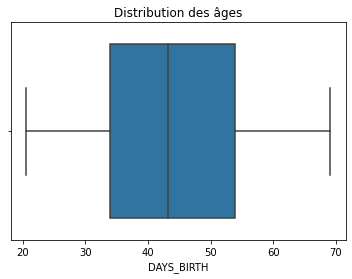

In [27]:
# On remarque que nos clients ont entre 34 et 54 ans et qu'il n'y a bien ni valeurs nulles ni valeurs abérantes 
sns.boxplot(application.DAYS_BIRTH)
plt.title('Distribution des âges')
plt.show()

In [28]:
# On ajoute une nouvelle colonne qui s'apppelle CATEGORIE_AGE
# On prend la valeur plancher de « Age » pour obtenir des nombres entiers

application['AGE']=abs(application["DAYS_BIRTH"])
slots = ['0-20','20-30','30-40','40-50','50-60','60-70','70 and above']
bins = [0,20,30,40,50,60,70,100]
application['CATEGORIE_AGE']=pd.cut(application['AGE'],bins,labels=slots)

In [29]:
application['CATEGORIE_AGE'].head()

0    20-30
1    40-50
2    50-60
3    50-60
4    50-60
Name: CATEGORIE_AGE, dtype: category
Categories (7, object): ['0-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70 and above']

In [30]:
# On vérifie le pourcentage de client dans chaque catégorie d'âge pour qu'il soit bien équilibré
application['CATEGORIE_AGE'].value_counts(normalize=True)*100

30-40           26.765872
40-50           24.890492
50-60           22.133192
20-30           14.640452
60-70           11.569993
70 and above     0.000000
0-20             0.000000
Name: CATEGORIE_AGE, dtype: float64

/Users/p-asalisbury/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/p-asalisbury/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution des clients qui ont eu des retards de paiement par âge')

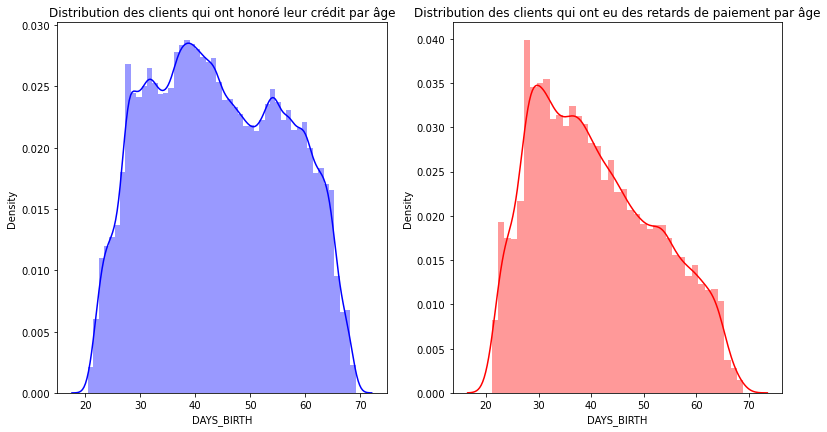

In [38]:
# Distribution de la variable âge

fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(application[application["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Distribution des clients qui ont honoré leur crédit par âge")

plt.subplot(222)
sns.distplot(application[application["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Distribution des clients qui ont eu des retards de paiement par âge")

In [33]:
application.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [34]:
application['DAYS_EMPLOYED']=abs(application['DAYS_EMPLOYED'])
application['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [35]:
# On crée des catégories de l'ancienneté de l'emploi actuel
application['YEARS_EMPLOYED'] = application['DAYS_EMPLOYED']
bins = [0,1,2,3,4,5,7,10,15,150]
slots = ['0-1','1-2','2-3','3-4','4-5','5-7','7-10','10-15','15 above']

application['YEARS_EMPLOYED']=pd.cut(application['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [36]:
# On vérifie le pourcentage de client dans chaque catégorie pour qu'il soit bien équilibré
application['YEARS_EMPLOYED'].value_counts(normalize=True)*100

15 above    99.402093
10-15        0.298954
7-10         0.089686
3-4          0.059791
5-7          0.044843
2-3          0.044843
1-2          0.029895
4-5          0.014948
0-1          0.014948
Name: YEARS_EMPLOYED, dtype: float64

DATA FRAME avec les variables recodées

In [37]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,CATEGORIE_AGE,YEARS_EMPLOYED
0,100002,1,1,1,2,1,0,202500.0,406597.5,24700.5,351000.0,1.0,1,1,1,1,0.018801,25.920548,637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,1.0,2,2,3,10,0,0,0,0,0,0,1,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,1.0,1.0,0.0149,1.0,2.0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,20-30,NaN
1,100003,0,1,2,2,2,0,270000.0,1293502.5,35698.5,1129500.0,2.0,2,2,2,1,0.003541,45.931507,1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,2.0,1,1,4,11,0,0,0,0,0,0,2,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,1.0,1.0,0.0714,2.0,2.0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,40-50,NaN
2,100004,0,2,1,1,1,0,67500.0,135000.0,6750.0,135000.0,1.0,1,1,1,1,0.010032,52.180822,225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,1.0,2,2,4,9,0,0,0,0,0,0,3,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,50-60,NaN
3,100006,0,1,2,2,1,0,135000.0,312682.5,29686.5,297000.0,1.0,1,1,3,1,0.008019,52.068493,3039,-9833.0,-2437,NaN,1,1,0,1,0,